In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import swan_vis as swan
from scipy import sparse

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [9]:
# get list of detected filtered isoforms
sg = swan.read('../swan/swan.p')
df = pd.read_csv('../talon/human_talon_abundance_filtered.tsv', sep='\t')

# compute regions with all the transcripts so we're using 
# the unified set
t_df, regions, counts = get_ic_tss_tes(sg,
                                         df,
                                         min_tpm=1, 
                                         gene_subset='polya',
                                         annot_slack=200,
                                         novel_slack=100)

# add tissue triplets, remove old obs triplets before that
temp = compute_triplets(t_df,
                        df, 
                        sample='mouse_match',
                        groupby='all')
temp.source = 'obs'
counts = counts.loc[counts.source != 'obs']
counts = pd.concat([counts, temp])

# add tissue triplets by sample
temp = compute_triplets(t_df,
                        df, 
                        sample='mouse_match',
                        groupby='sample')
counts = pd.concat([counts, temp])

# add tpm on the sample level to the table
df = pd.read_csv('../talon/human_talon_abundance.tsv', sep='\t')
gene_df,_ = get_tpm_table(df,
                         how='gene',
                         min_tpm=1, 
                         gene_subset='polya',
                         groupby='sample')
gene_df = gene_df.melt(ignore_index=False)
gene_df.rename({'value':'tpm'}, axis=1, inplace=True)
gene_df.reset_index(inplace=True)
gene_df.rename({'index': 'gid'}, axis=1, inplace=True)
counts = counts.merge(gene_df, how='left', left_on=['source', 'gid'], right_on=['biosample', 'gid'])

Read in graph from ../swan/swan.p
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 185293
# isos >= 1 tpm: 167378
Applying gene type and novelty subset
Number of isos reported: 106687
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 185293
# isos >= 1 tpm: 112819
Applying gene type and novelty subset
Number of isos reported: 65928
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 185293
# isos >= 1 tpm: 112819
Applying gene type and novelty subset
Number of isos reported: 65928
Found 3 total samples
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes
Enforcing minimum TPM
Total # genes detected: 559881
# genes >= 1 tpm: 27

In [10]:
# save all triplets
counts.to_csv('mouse_match_triplets.tsv', sep='\t', index=False)

In [9]:
counts.tail()

,tss,intron_chain,tes,tss_ic_tes,splicing_ratio,source,gid,gname,biotype,biotype_category,tf,biosample,tpm,total,tss_ratio,tes_ratio,spl_ratio,sector
177132,1,1,1,1,1.000000,muscle,ENSG00000285920.1,AC087721.2,protein_coding,protein_coding,False,muscle,12.781739,3.000000,0.333333,0.333333,0.333333,simple
177133,1,1,1,1,1.000000,muscle,ENSG00000285932.1,AL133353.2,protein_coding,protein_coding,False,muscle,4.039640,3.000000,0.333333,0.333333,0.333333,simple
177134,1,1,1,1,1.000000,muscle,ENSG00000285967.1,NIPBL-DT,bidirectional_promoter_lncRNA,lncRNA,False,muscle,2.672183,3.000000,0.333333,0.333333,0.333333,simple
177135,1,2,2,2,1.333333,muscle,ENSG00000285976.1,AL135905.2,protein_coding,protein_coding,False,muscle,804.968219,4.333333,0.230769,0.461538,0.307692,simple
177136,1,1,1,1,1.000000,muscle,ENSG00000285991.1,AL355312.5,protein_coding,protein_coding,False,muscle,11.808423,3.000000,0.333333,0.333333,0.333333,simple


## Simplex plots

In [3]:
c_dict, order = get_biosample_colors()
c_dict['GENCODE'] = 'k'
c_dict['obs'] = 'k'
counts = pd.read_csv('mouse_match_triplets.tsv', sep='\t')

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3427: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
counts.source.unique()

array(['GENCODE', 'all', 'obs', 'adrenal gland', 'heart', 'muscle'],
      dtype=object)

[100, 100, array([10.]), array([300.]), array([230.69288669])]


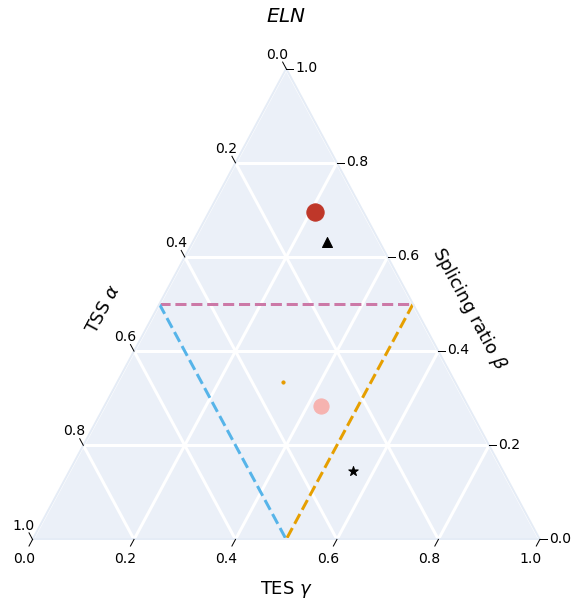

In [12]:
# ELN
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='ELN',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

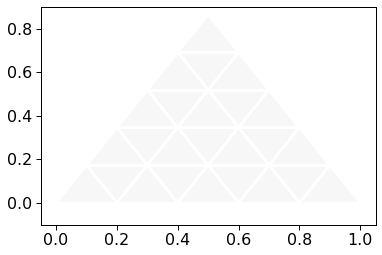

In [27]:
# CTCF
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='Ctcf',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

[100, 100, array([88.52000085]), array([10.]), array([300.])]


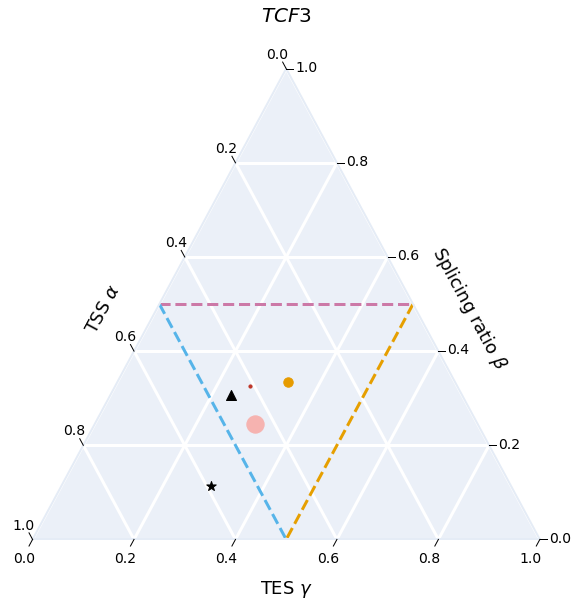

In [13]:
# TCF3
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TCF3',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

[100, 100, array([300.]), array([196.25778012]), array([10.])]


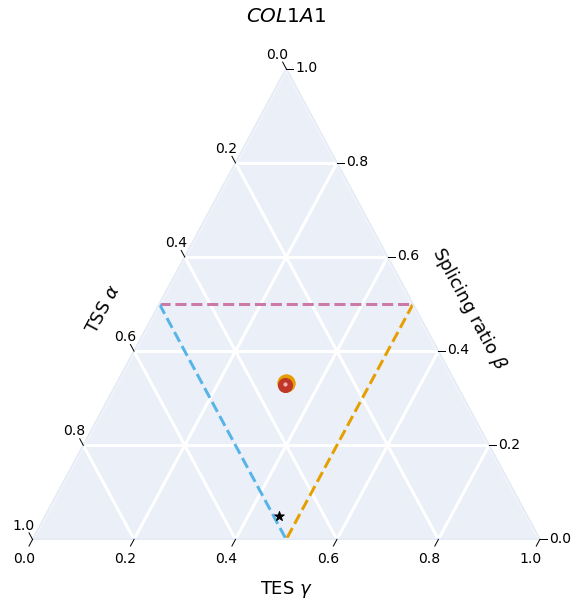

In [15]:
# COL1A1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            size='tpm', 
            sectors=True,
            log_size=True,
            cmap=c_dict,
            mmap={'GENCODE': '*', 'obs': '^'},
            legend=False,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all']))}, 
            opref='figures/human')

In [8]:
counts.source.unique()

array(['GENCODE', 'all', 'obs'], dtype=object)

## Compare human and mouse

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import swan_vis as swan
from scipy import sparse

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [11]:
counts = pd.read_csv('mouse_match_triplets.tsv', sep='\t')
m_counts = pd.read_csv('../../../mousewg/lr_bulk/triplets/triplets.tsv', sep='\t')

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning:

Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.



In [12]:
# GENCODE
count_gisx_region_genes(counts, 'GENCODE', .5, .5, .5)

# observed
count_gisx_region_genes(counts, 'obs', .5, .5, .5)

58780 genes are in GENCODE
3096 (5.27%) genes are TSS-high in GENCODE
3599 (6.12%) genes are TES-high in GENCODE
195 (0.33%) genes are splicing-high in GENCODE
51890 (88.28%) genes are simple in GENCODE
17582 genes are in obs
1017 (5.78%) genes are TSS-high in obs
938 (5.34%) genes are TES-high in obs
1066 (6.06%) genes are splicing-high in obs
14561 (82.82%) genes are simple in obs


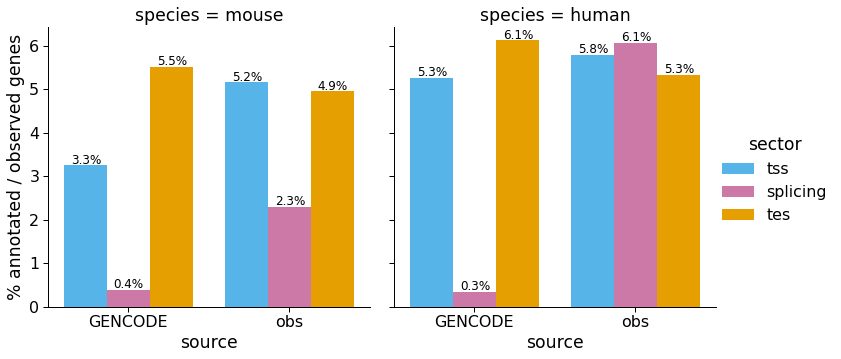

In [13]:
temp = plot_species_sector_gene_counts(m_counts, counts)

In [19]:
print(counts.loc[counts.gname == 'CTCF', ['source', 'sector']])
print(m_counts.loc[m_counts.gname == 'Ctcf', ['source', 'sector']])


               source  sector
2735          GENCODE     tss
61515             all     tss
119884            obs     tss
137183  adrenal gland  simple
151402          heart     tss
167296         muscle  simple
                     source  sector
887                 GENCODE     tes
56423                   all     tes
111905                  obs  simple
132892          adrenal_10d  simple
148042          adrenal_14d  simple
163336      adrenal_18-20mo  simple
176997          adrenal_25d  simple
191322          adrenal_2mo  simple
205223          adrenal_36d  simple
218534           adrenal_4d  simple
234276           cortex_14d  simple
249203       cortex_18-20mo  simple
264535           cortex_2mo  simple
279368          gastroc_10d  simple
291940          gastroc_14d  simple
303322      gastroc_18-20mo  simple
314695          gastroc_25d  simple
325382          gastroc_2mo  simple
336374          gastroc_36d  simple
347283           gastroc_4d  simple
361785            heart_14d  simpl

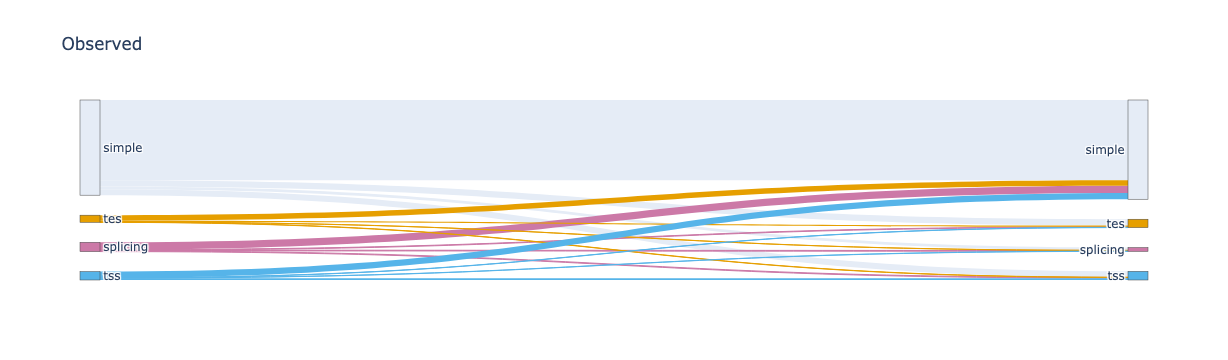

In [14]:
# observed
df = compare_species(counts, m_counts, source='obs') 
df = df[['gid_human', 'sector_human', 'sector_mouse']].groupby(['sector_human', 'sector_mouse']).count().reset_index()
df.rename({'gid_human': 'n_genes'}, axis=1, inplace=True)

plot_sankey(df, source='sector_human', sink='sector_mouse', title='Observed')

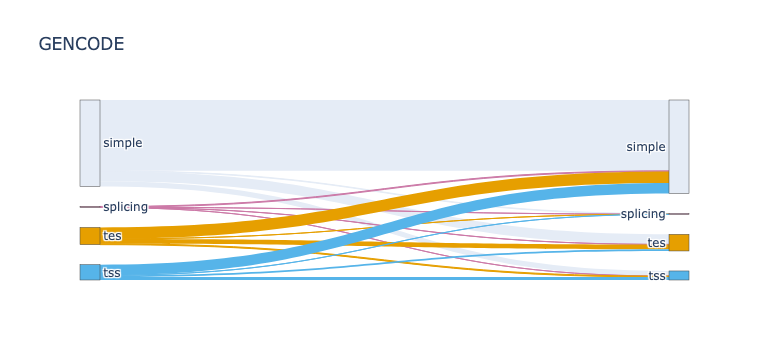

In [6]:
# GENCODE
df = compare_species(counts, m_counts, source='GENCODE') 
df = df[['gid_human', 'sector_human', 'sector_mouse']].groupby(['sector_human', 'sector_mouse']).count().reset_index()
df.rename({'gid_human': 'n_genes'}, axis=1, inplace=True)

plot_sankey(df, source='sector_human', sink='sector_mouse', title='GENCODE')

In [7]:
df.head()

,sector_human,sector_mouse,n_genes,source,sink
0,simple,simple,11714,0,4
1,simple,splicing,88,0,6
2,simple,tes,1655,0,5
3,simple,tss,846,0,7
4,splicing,simple,132,2,4


In [42]:
unchanged = df.loc[df.sector_human == df.sector_mouse, 'n_genes'].sum()
total = df.n_genes.sum()
print(unchanged/total)

0.7006558877364246


In [44]:
n = df.loc[(df.sector_human == 'simple')&(df.sector_mouse == 'simple'), 'n_genes'].sum()
n / total

0.6688529591214155

In [50]:
for sect in ['tss', 'splicing', 'tes', 'simple']:
    n = df.loc[(df.sector_human==sect)&(df.sector_mouse==sect), 'n_genes'].sum()
    # t = df.loc[df.sector_human==sect, 'n_genes'].sum()
    t = df.loc[df.sector_mouse==sect, 'n_genes'].sum()
    print(sect)
    print(n/t)
    print()
    

tss
0.21164021164021163

splicing
0.18689320388349515

tes
0.15350877192982457

simple
0.8088167481324356

